In [0]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [107]:
df_final = pd.read_csv('https://raw.githubusercontent.com/deforestation-dashboard/build_deforestationDash_DS1/master/deforestation_dataset_final_V4.csv')

df_final.shape

df_final['forest_propotion_to_land'] = df_final['forest_propotion_to_land'].fillna(method='ffill')

# df_final = df_final.pivot_table(values=['forest_area_km', 'country_land_area_km',
#                                        'forest_propotion_to_land','country_population',
#                                        'wood_removal', 'total_land_usage','carbon_emission', 'mean_yearly_exposure_pollution'],
#                                index='year',
#                                columns=['country'])

df_final = df_final.pivot_table(values=['forest_propotion_to_land'],
                               index='year',
                               columns=['country'])

#df_final = df_final.stack(level='country')
df_final.head(35)


forest_propotion_to_land                                         \
country              Afghanistan Albania Algeria American Samoa Andorra   
year                                                                      
1990                        2.07   28.79    0.70          91.94   34.04   
1991                        2.07   28.79    0.70          91.94   34.04   
1992                        2.07   28.79    0.70          91.94   34.04   
1993                        2.07   28.79    0.70          91.94   34.04   
1994                        2.07   28.79    0.70          91.94   34.04   
1995                        2.07   28.79    0.70          91.94   34.04   
1996                        2.07   28.79    0.70          91.94   34.04   
1997                        2.07   28.79    0.70          91.94   34.04   
1998                        2.07   28.79    0.70          91.94   34.04   
1999                        2.07   28.79    0.70          91.94   34.04   
2000                        2.07   28.08    0.66          90.25   34.04   
2001                        2.07   28.08    0.66          90.25   34.04   
2002                        2.07   28.08    0.66          90.25   34.04   
2003                        2.07   28.08    0.66          90.25   34.04   
2004                        2.07   28.08    0.66          90.25   34.04   
2005                        2.07   28.55    0.64          89.41   34.04   
2006                        2.07   28.55    0.64          89.41   34.04   
2007                        2.07   28.55    0.64          89.41   34.04   
2008                        2.07   28.55    0.64          89.41   34.04   
2009                        2.07   28.55    0.64          89.41   34.04   
2010                        2.07   28.33    0.81          88.56   34.04   
2011                        2.07   28.33    0.81          88.56   34.04   
2012                        2.07   28.33    0.81          88.56   34.04   
2013                        2.07   28.33    0.81          88.56   34.04   
2014                        2.07   28.33    0.81          88.56   34.04   
2015                        2.07   28.16    0.82          87.72   34.04   

                                                                  ...     \
country Angola Antigua and Barbuda Arab World Argentina Armenia   ...      
year                                                              ...      
1990     48.91               23.41      22.27     12.71   11.88   ...      
1991     48.91               23.41      22.27     12.71   11.88   ...      
1992     48.91               23.41      22.27     12.71   11.88   ...      
1993     48.91               23.41      22.27     12.71   11.88   ...      
1994     48.91               23.41      22.27     12.71   11.88   ...      
1995     48.91               23.41      22.27     12.71   11.88   ...      
1996     48.91               23.41      22.27     12.71   11.88   ...      
1997     48.91               23.41      22.27     12.71   11.88   ...      
1998     48.91               23.41      22.27     12.71   11.88   ...      
1999     48.91               23.41      22.27     12.71   11.88   ...      
2000     47.91               22.73      22.27     11.64   11.81   ...      
2001     47.91               22.73      22.27     11.64   11.81   ...      
2002     47.91               22.73      22.27     11.64   11.81   ...      
2003     47.91               22.73      22.27     11.64   11.81   ...      
2004     47.91               22.73      22.27     11.64   11.81   ...      
2005     47.41               22.27      22.27     11.03   11.77   ...      
2006     47.41               22.27      22.27     11.03   11.77   ...      
2007     47.41               22.27      22.27     11.03   11.77   ...      
2008     47.41               22.27      22.27     11.03   11.77   ...      
2009     47.41               22.27      22.27     11.03   11.77   ...      
2010     46.91               22.27      22.27     10.45   11.74   ...      
2011    

In [109]:
df_final.head(20)

forest_propotion_to_land                                         \
country              Afghanistan Albania Algeria American Samoa Andorra   
year                                                                      
1990                        2.07   28.79    0.70          91.94   34.04   
1991                        2.07   28.79    0.70          91.94   34.04   
1992                        2.07   28.79    0.70          91.94   34.04   
1993                        2.07   28.79    0.70          91.94   34.04   
1994                        2.07   28.79    0.70          91.94   34.04   
1995                        2.07   28.79    0.70          91.94   34.04   
1996                        2.07   28.79    0.70          91.94   34.04   
1997                        2.07   28.79    0.70          91.94   34.04   
1998                        2.07   28.79    0.70          91.94   34.04   
1999                        2.07   28.79    0.70          91.94   34.04   
2000                        2.07   28.08    0.66          90.25   34.04   
2001                        2.07   28.08    0.66          90.25   34.04   
2002                        2.07   28.08    0.66          90.25   34.04   
2003                        2.07   28.08    0.66          90.25   34.04   
2004                        2.07   28.08    0.66          90.25   34.04   
2005                        2.07   28.55    0.64          89.41   34.04   
2006                        2.07   28.55    0.64          89.41   34.04   
2007                        2.07   28.55    0.64          89.41   34.04   
2008                        2.07   28.55    0.64          89.41   34.04   
2009                        2.07   28.55    0.64          89.41   34.04   

                                                                  ...     \
country Angola Antigua and Barbuda Arab World Argentina Armenia   ...      
year                                                              ...      
1990     48.91               23.41      22.27     12.71   11.88   ...      
1991     48.91               23.41      22.27     12.71   11.88   ...      
1992     48.91               23.41      22.27     12.71   11.88   ...      
1993     48.91               23.41      22.27     12.71   11.88   ...      
1994     48.91               23.41      22.27     12.71   11.88   ...      
1995     48.91               23.41      22.27     12.71   11.88   ...      
1996     48.91               23.41      22.27     12.71   11.88   ...      
1997     48.91               23.41      22.27     12.71   11.88   ...      
1998     48.91               23.41      22.27     12.71   11.88   ...      
1999     48.91               23.41      22.27     12.71   11.88   ...      
2000     47.91               22.73      22.27     11.64   11.81   ...      
2001     47.91               22.73      22.27     11.64   11.81   ...      
2002     47.91               22.73      22.27     11.64   11.81   ...      
2003     47.91               22.73      22.27     11.64   11.81   ...      
2004     47.91               22.73      22.27     11.64   11.81   ...      
2005     47.41               22.27      22.27     11.03   11.77   ...      
2006     47.41               22.27      22.27     11.03   11.77   ...      
2007     47.41               22.27      22.27     11.03   11.77   ...      
2008     47.41               22.27      22.27     11.03   11.77   ...      
2009     47.41               22.27      22.27     11.03   11.77   ...      

                                                                          \
country Upper middle income Uruguay Uzbekistan Vanuatu Venezuela Vietnam   
year                                                                       
1990                  50.29    4.56       6.91    36.1     58.98   30.20   
1991                  50.29    4.56       6.91    36.1     58.98   30.20   
1992                  50.29    4.56       6.91    36.1     58.98   30.20   
1993                  50.29    4.56       6.91    36.1     58.98   30.20   
1

In [0]:
pd.to_datetime(df_final.index, format='%Y')

In [28]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [96]:
df_final.index = pd.to_datetime(df_final.index, format='%Y')

mod = sm.tsa.statespace.SARIMAX(df_final['forest_propotion_to_land']['Afghanistan'],
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 1),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

start_params = [0, 0, 1.]
results = mod.fit()

print(results.summary().tables[1])



                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2              0   6.17e-11          0      1.000   -1.21e-10    1.21e-10


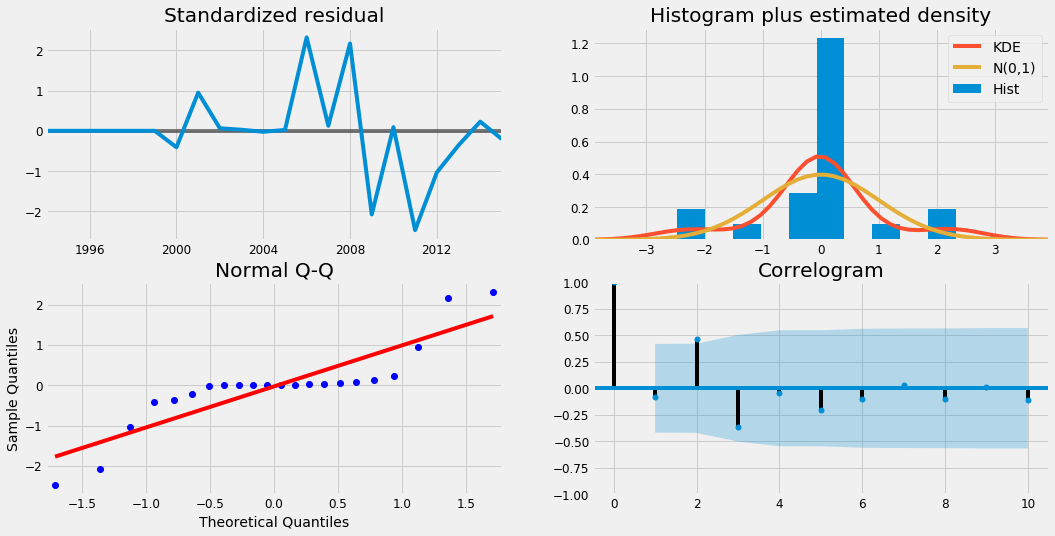

In [19]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

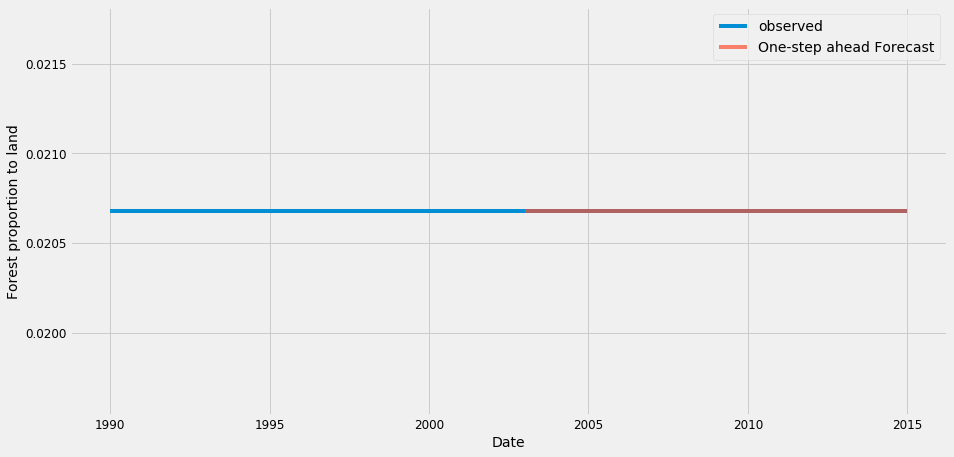

2003-01-01    0.020678
2004-01-01    0.020678
2005-01-01    0.020678
2006-01-01    0.020678
2007-01-01    0.020678
2008-01-01    0.020678
2009-01-01    0.020678
2010-01-01    0.020678
2011-01-01    0.020678
2012-01-01    0.020678
2013-01-01    0.020678
2014-01-01    0.020678
2015-01-01    0.020678
Freq: AS-JAN, dtype: float64

In [98]:
pred = results.get_prediction(start=pd.to_datetime('2003-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = df_final['forest_propotion_to_land']['Afghanistan']["1990-01-01":"2021-01-01"].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Forest proportion to land')
plt.legend()

plt.show()
plt.close()
pred.predicted_mean

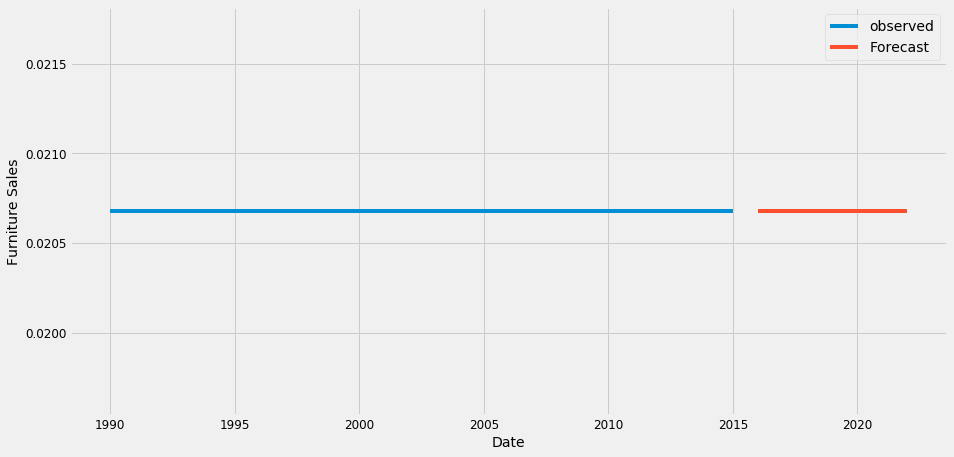

2016-01-01    0.020678
2017-01-01    0.020678
2018-01-01    0.020678
2019-01-01    0.020678
2020-01-01    0.020678
2021-01-01    0.020678
2022-01-01    0.020678
Freq: AS-JAN, dtype: float64

In [99]:
pred_uc = results.get_forecast(steps=7)
pred_ci = pred_uc.conf_int()

ax = df_final['forest_propotion_to_land']['Afghanistan']["1990-01-01":"2021-01-01"].plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()
pred_uc.predicted_mean

In [36]:
pred_uc.predicted_mean

2016-01-01    0.468078
2017-01-01    0.468078
2018-01-01    0.468078
2019-01-01    0.468078
2020-01-01    0.468078
2021-01-01    0.468078
2022-01-01    0.468078
Freq: AS-JAN, dtype: float64

In [95]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

df_final = pd.read_csv('https://raw.githubusercontent.com/deforestation-dashboard/build_deforestationDash_DS1/master/deforestation_dataset_final_V4.csv')

df_final.shape
df_final['forest_propotion_to_land'] = df_final['forest_area_km']/df_final['country_land_area_km']
df_final['forest_propotion_to_land'] = df_final['forest_propotion_to_land'].fillna(method='ffill')

df_final = df_final.pivot_table(values=['forest_area_km', 'country_land_area_km',
                                       'forest_propotion_to_land','country_population',
                                       'wood_removal', 'total_land_usage','carbon_emission', 'mean_yearly_exposure_pollution'],
                               index='year',
                               columns=['country'])

#df_final = df_final.stack(level='country')

df_final.head(35)

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

df_final.index = pd.to_datetime(df_final.index, format='%Y')

mod = sm.tsa.statespace.SARIMAX(df_final['forest_propotion_to_land']['Afghanistan'],
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 1),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

start_params = [0, 0, 1.]
results = mod.fit()

pred = results.get_prediction(start=pd.to_datetime('2003-01-01'), dynamic=False)
pred_ci = pred.conf_int()
pred_uc = results.get_forecast(steps=7)
pred_uc.predicted_mean




2016-01-01    0.020678
2017-01-01    0.020678
2018-01-01    0.020678
2019-01-01    0.020678
2020-01-01    0.020678
2021-01-01    0.020678
2022-01-01    0.020678
Freq: AS-JAN, dtype: float64

In [110]:
countries = ['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Arab World', 
 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 
 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 
 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 
 'Cameroon', 'Canada', 'Cape Verde', 'Caribbean small states', 'Cayman Islands', 'Central African Republic', 
 'Central Europe and the Baltics', 'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 
 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Democratic Republic of Congo', 
 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Early-demographic dividend', 'East Asia & Pacific', 
 'East Asia & Pacific (IDA & IBRD)', 'East Asia & Pacific (excluding high income)', 'Ecuador', 'Egypt', 
 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Euro area', 'Europe & Central Asia', 
 'Europe & Central Asia (IDA & IBRD)', 'Europe & Central Asia (excluding high income)', 'European Union', 
 'Faeroe Islands', 'Fiji', 'Finland', 'Fragile and conflict affected situations', 'France', 'French Polynesia', 
 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Greenland', 'Grenada', 'Guam', 
 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Heavily indebted poor countries (HIPC)', 'High income', 
 'Honduras', 'Hungary', 'IBRD only', 'IDA & IBRD total', 'IDA blend', 'IDA only', 'IDA total', 'Iceland', 'India', 
 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 
 'Kenya', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Late-demographic dividend', 'Latin America & Caribbean', 
 'Latin America & Caribbean (IDA & IBRD)', 'Latin America & Caribbean (excluding high income)', 'Latvia', 
 'Least developed countries: UN classification', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 
 'Lithuania', 'Low & middle income', 'Low income', 'Lower middle income', 'Luxembourg', 'Macedonia', 'Madagascar', 
 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Marshall Islands', 'Mauritania', 'Mauritius', 'Mexico', 
 'Micronesia (country)', 'Middle East & North Africa', 'Middle East & North Africa (IDA & IBRD)', 
 'Middle East & North Africa (excluding high income)', 'Middle income', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco', 
 'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Netherlands', 'New Caledonia', 'New Zealand', 'Nicaragua', 
 'Niger', 'Nigeria', 'North America', 'North Korea', 'Northern Mariana Islands', 'Norway', 'OECD members', 'Oman', 
 'Other small states', 'Pacific island small states', 'Pakistan', 'Palau', 'Palestine', 'Panama', 'Papua New Guinea', 
 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Post-demographic dividend', 'Pre-demographic dividend', 
 'Puerto Rico', 'Qatar', 'Romania', 'Russia', 'Rwanda', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Martin (French part)', 
 'Saint Vincent and the Grenadines', 'Samoa', 'San Marino', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 
 'Seychelles', 'Sierra Leone', 'Singapore', 'Slovakia', 'Slovenia', 'Small states', 'Solomon Islands', 'Somalia', 
 'South Africa', 'South Asia', 'South Asia (IDA & IBRD)', 'South Korea', 'Spain', 'Sri Lanka', 'Sub-Saharan Africa', 
 'Sub-Saharan Africa (IDA & IBRD)', 'Sub-Saharan Africa (excluding high income)', 'Sudan', 'Suriname', 'Swaziland', 'Sweden', 
 'Switzerland', 'Syrian Arab Republic', 'Tajikistan', 'Tanzania', 'Thailand', 'Timor', 'Togo', 'Tonga', 'Trinidad and Tobago', 
 'Tunisia', 'Turkey', 'Turkmenistan', 'Turks and Caicos Islands', 'Tuvalu', 'Uganda', 'Ukraine', 'United Arab Emirates', 
 'United Kingdom', 'United States', 'United States Virgin Islands', 'Upper middle income', 'Uruguay', 'Uzbekistan', 'Vanuatu', 
 'Venezuela', 'Vietnam', 'World', 'Yemen', 'Zambia', 'Zimbabwe']

# South Sudan doesn't have enough data point to make prediction

df_final.index = pd.to_datetime(df_final.index, format='%Y')
add_df = pd.DataFrame({'country': [0],'year': [0], 'forest_propotion_to_land': [0]})
print(add_df)

for i in countries:
  p = d = q = range(0, 2)
  pdq = list(itertools.product(p, d, q))
  seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

  mod = sm.tsa.statespace.SARIMAX(df_final['forest_propotion_to_land'][i],
                                  order=(1, 1, 1),
                                  seasonal_order=(1, 1, 0, 1),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)

  start_params = [0, 0, 1.]
  results = mod.fit()

  pred = results.get_prediction(start=pd.to_datetime('2003-01-01'), dynamic=False)
  pred_ci = pred.conf_int()
  pred_uc = results.get_forecast(steps=7)
  new_df=pd.DataFrame({'country': [i,i,i,i,i,i,i],'year':pred_uc.predicted_mean.index, 'forest_propotion_to_land':pred_uc.predicted_mean.values})
  add_df = pd.concat([add_df, new_df])


add_df = add_df.reset_index()
add_df['year'] = add_df['year'].astype(str)
add_df['year'] = add_df['year'].str.rsplit('-',0).str[0]
add_df.to_csv('prediction.csv')

  

   country  year  forest_propotion_to_land
0        0     0                         0
